In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet
%matplotlib inline

In [52]:
df=pd.read_csv('Book1.csv') 
df.head()

,Date,Price USD per Oz,Price INR per Gm
0,2009-01,857.726,2264.618110
1,2009-02,939.763,2481.216972
2,2009-03,925.989,2444.850056
3,2009-04,892.663,2356.860811
4,2009-05,926.855,2447.136519


In [84]:
df.shape

(139, 2)

In [53]:
df.drop(['Price USD per Oz'],axis=1,inplace=True)
df.head()

,Date,Price INR per Gm
0,2009-01,2264.618110
1,2009-02,2481.216972
2,2009-03,2444.850056
3,2009-04,2356.860811
4,2009-05,2447.136519


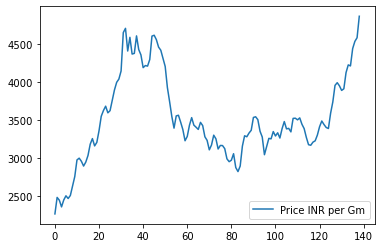

In [54]:
df.plot()

In [55]:
df.rename(columns={'Date':'ds','Price INR per Gm':'y'},inplace=True)
df.head()

,ds,y
0,2009-01,2264.618110
1,2009-02,2481.216972
2,2009-03,2444.850056
3,2009-04,2356.860811
4,2009-05,2447.136519


In [56]:
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2009-01-01,2264.618110
1,2009-02-01,2481.216972
2,2009-03-01,2444.850056
3,2009-04-01,2356.860811
4,2009-05-01,2447.136519


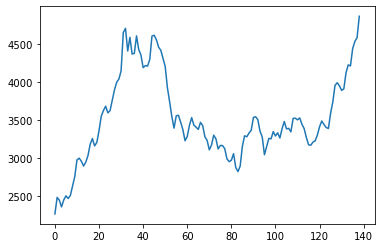

In [57]:
df['y'].plot()

In [58]:
from fbprophet import Prophet
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [60]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [61]:
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,2009-01-01
1,2009-02-01
2,2009-03-01
3,2009-04-01
4,2009-05-01
...,...
499,2021-06-27
500,2021-06-28
501,2021-06-29
502,2021-06-30


In [62]:
prediction=model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-01-01,2358.432321,2003.707981,2559.700845,2358.432321,2358.432321,-73.011374,-73.011374,-73.011374,-73.011374,-73.011374,-73.011374,0.0,0.0,0.0,2285.420947
1,2009-02-01,2417.217587,2032.456159,2588.000835,2417.217587,2417.217587,-101.382608,-101.382608,-101.382608,-101.382608,-101.382608,-101.382608,0.0,0.0,0.0,2315.834979
2,2009-03-01,2470.313957,2155.004288,2726.235959,2470.313957,2470.313957,-3.794197,-3.794197,-3.794197,-3.794197,-3.794197,-3.794197,0.0,0.0,0.0,2466.519760
3,2009-04-01,2529.099223,2233.459764,2803.056824,2529.099223,2529.099223,-25.322544,-25.322544,-25.322544,-25.322544,-25.322544,-25.322544,0.0,0.0,0.0,2503.776680
4,2009-05-01,2585.988191,2262.948132,2787.466429,2585.988191,2585.988191,-56.274119,-56.274119,-56.274119,-56.274119,-56.274119,-56.274119,0.0,0.0,0.0,2529.714072


In [69]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].tail(30)

,ds,yhat_lower,yhat_upper,yhat
474,2021-06-02,4094.325928,4689.857940,4392.088142
475,2021-06-03,4079.909476,4670.496651,4371.898885
476,2021-06-04,4069.818684,4647.903550,4349.891020
477,2021-06-05,4044.366785,4615.993690,4325.702440
478,2021-06-06,4020.599610,4596.671880,4299.003631
479,2021-06-07,3959.604424,4556.099129,4269.527372
480,2021-06-08,3949.418666,4546.763684,4237.098409
481,2021-06-09,3918.654412,4484.409654,4201.661854
482,2021-06-10,3864.387127,4465.735073,4163.309043
483,2021-06-11,3819.411226,4427.615224,4122.299659


In [64]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].head(10)

,ds,yhat_lower,yhat_upper,yhat
0,2009-01-01,2003.707981,2559.700845,2285.420947
1,2009-02-01,2032.456159,2588.000835,2315.834979
2,2009-03-01,2155.004288,2726.235959,2466.519760
3,2009-04-01,2233.459764,2803.056824,2503.776680
4,2009-05-01,2262.948132,2787.466429,2529.714072
5,2009-06-01,2304.862266,2864.476076,2590.103404
6,2009-07-01,2386.103074,2970.593930,2670.025353
7,2009-08-01,2390.889746,2948.658161,2678.252151
8,2009-09-01,2545.217257,3115.441465,2817.875009
9,2009-10-01,2569.451143,3141.459808,2855.377007


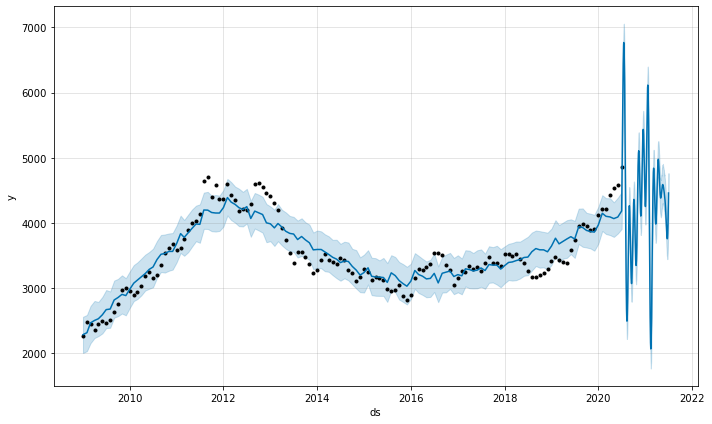

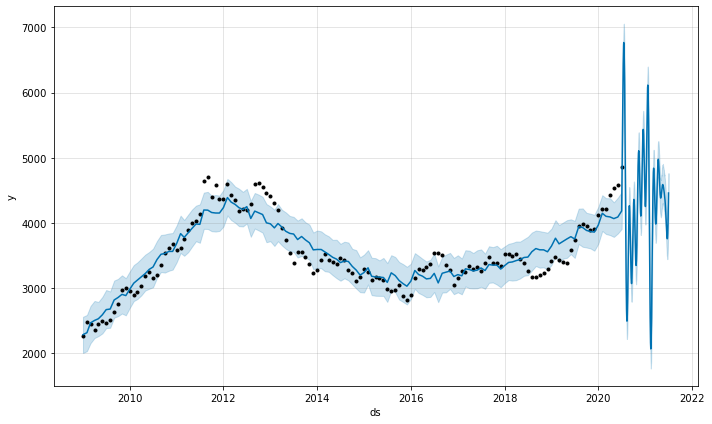

In [65]:
model.plot(prediction)

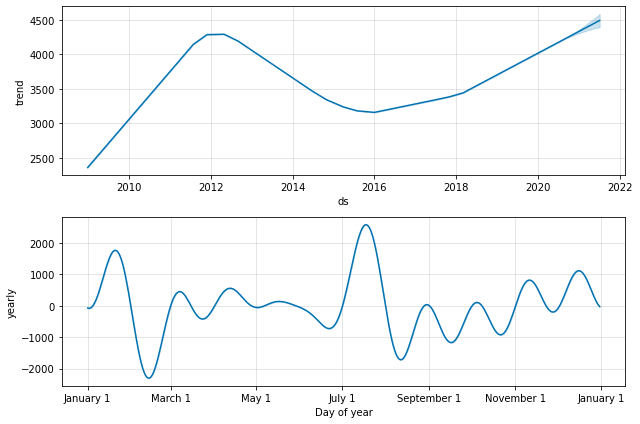

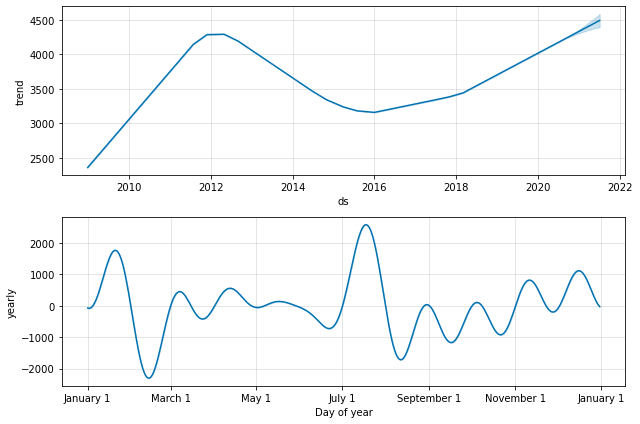

In [70]:
model.plot_components(prediction)

In [71]:
from fbprophet.diagnostics import cross_validation

In [109]:
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 16 forecasts with cutoffs between 2012-02-09 00:00:00 and 2019-07-02 00:00:00


In [110]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-03-01,4611.504044,4488.695030,4743.709135,4422.582989,2012-02-09
1,2012-04-01,4651.363729,4517.155385,4773.219588,4352.568622,2012-02-09
2,2012-05-01,4964.983419,4845.498255,5091.057754,4185.110245,2012-02-09
3,2012-06-01,5229.094159,5103.466708,5355.965865,4212.880481,2012-02-09
4,2012-07-01,5208.550227,5082.628512,5337.273908,4205.361026,2012-02-09


In [111]:
from fbprophet.diagnostics import performance_metrics

In [112]:
df_perf=performance_metrics(df_cv)
df_perf.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,96614.177949,310.828213,253.459391,0.071099,0.060822,0.421053
1,40 days,91432.392375,302.377897,238.476055,0.066802,0.058464,0.473684
2,42 days,102510.217303,320.172168,253.515130,0.071513,0.058464,0.473684
3,46 days,115161.619218,339.354710,270.933247,0.076256,0.058464,0.421053
4,47 days,115186.059535,339.390718,271.160681,0.076241,0.058464,0.421053


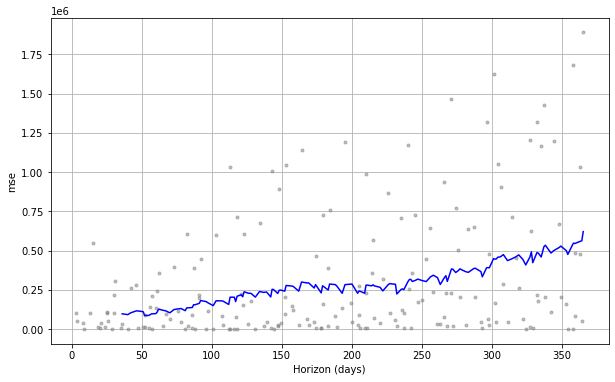

In [114]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')

,ds
0,2009-01-01
1,2009-02-01
2,2009-03-01
3,2009-04-01
4,2009-05-01
...,...
499,2021-06-27
500,2021-06-28
501,2021-06-29
502,2021-06-30


In [94]:
prediction[330:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
330,2021-01-09,4342.122048,4504.595752,5062.896843,4311.457735,4371.006724,443.417428,443.417428,443.417428,443.417428,443.417428,443.417428,0.0,0.0,0.0,4785.539476
331,2021-01-10,4342.984796,4653.473914,5202.471043,4312.029001,4372.171474,586.791458,586.791458,586.791458,586.791458,586.791458,586.791458,0.0,0.0,0.0,4929.776254
332,2021-01-11,4343.847544,4804.676006,5366.926759,4312.547525,4373.383741,738.206353,738.206353,738.206353,738.206353,738.206353,738.206353,0.0,0.0,0.0,5082.053897
333,2021-01-12,4344.710291,4952.164380,5515.128708,4313.120063,4374.667810,893.562117,893.562117,893.562117,893.562117,893.562117,893.562117,0.0,0.0,0.0,5238.272409
334,2021-01-13,4345.573039,5114.515618,5672.276796,4313.694184,4375.927268,1048.516568,1048.516568,1048.516568,1048.516568,1048.516568,1048.516568,0.0,0.0,0.0,5394.089608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2021-06-27,4487.926445,3686.423075,4250.521891,4392.406351,4578.192526,-514.661656,-514.661656,-514.661656,-514.661656,-514.661656,-514.661656,0.0,0.0,0.0,3973.264789
500,2021-06-28,4488.789193,3778.552793,4362.214286,4392.726941,4579.021619,-420.666415,-420.666415,-420.666415,-420.666415,-420.666415,-420.666415,0.0,0.0,0.0,4068.122777
501,2021-06-29,4489.651941,3855.945888,4491.620985,4393.069548,4580.510808,-308.514771,-308.514771,-308.514771,-308.514771,-308.514771,-308.514771,0.0,0.0,0.0,4181.137169
502,2021-06-30,4490.514688,4024.024284,4625.130122,4393.412156,4581.987461,-178.571683,-178.571683,-178.571683,-178.571683,-178.571683,-178.571683,0.0,0.0,0.0,4311.943006
